# MIS780 Advanced AI For Business - Assignment 2 - T2 2023

## Task 2: Agricultural pest recognition with image data

**Student Name:** Aman Rajput

**Student ID:** 221069377

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary


The agriculture sector is constantly challenged to strike a balance between productivity and sustainability. Accurate identification of potential pests, as well as beneficial insects such as bees, is essential for effective pest management. The importance of identifying pests and friends in agriculture, as well as the studies undertaken and their findings has to be emphasized in order to gain deeper understanding. Effective pest management is critical for increasing agricultural yields while minimising economic losses. Farmers need to employ accurate pest and beneficial insect identification to execute targeted tactics, reduce chemical use, and assure optimal pollination, for which ML can be utilized.

<br>

Therefore, the aim is to build agricultural pest recognition ML models to help out farmers. The dataset used for ML model experimentation contains images of various agricultural pests, including grasshoppers, moths, ants, and wasps, along with beneficial insects such as bees. This diverse collection of images forms the basis for training machine learning models (*Section 2*).
Machine learning techniques, specifically deep learning models, were employed to classify images of pests and friends. The experiments aimed to optimize model performance through data augmentation, learning rate scheduling, and utilizing pre-trained models like VGG16.(*Section 3*)


* The first optimization, data augmentation, resulted in a Cohen's kappa value of 0.605, which indicates moderate agreement between predicted and actual classes. The accuracy on the training data was very high (98.96%), but on the test data, it dropped to 68.44%, suggesting overfitting (*Section 4 Optimization 1*).
* The second optimization, learning rate scheduling, resulted in a Cohen's kappa value of 0.632, which shows moderate to substantial agreement. The model's overfitting issue has improved compared to the first optimization, with a test accuracy of 70.61% (*Section 4 Optimization 2*).
* The third optimization, utilizing a pre-trained model (VGG16), resulted in a Cohen's kappa value of 0.786, which suggests substantial agreement. The model's performance has significantly improved compared to the previous optimizations, with a test accuracy of 82.84% and a minimal overfitting issue (*Section 4 Optimization 3*).


<br>


The first two optimizations suffer from overfitting to some extent, leading to a gap between training and test accuracy. This means that the models perform well on seen data but may struggle with real-world applications due to poor generalization. These models might require more data or regularization techniques to improve performance. The third optimization utilizing a pre-trained model (VGG16) has shown the best performance in terms of accuracy and generalization. This model can provide a reliable way to classify agricultural pests and potentially provide insights into pest management strategies.

<br>


To further improve outputs, further refinement can still be explored, such as fine-tuning the pre-trained model, exploring different architectures, and expanding the dataset to improve the model's performance and generalization even more (*refer to Section 4 findings*). With the highly accurate pre-trained model, organizations could develop a tool that helps agricultural professionals and enthusiasts identify potential pests or friends among insects found in agricultural settings. The model could be integrated into mobile apps or web platforms, allowing users to upload images of insects and receive instant classification results. This can aid in early pest detection and help make informed decisions about pest control strategies, potentially leading to more effective and sustainable agricultural practices.


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

Configuring the platform

In [ ]:
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data generation

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

# Function to load and preprocess image data
def load_and_preprocess_images(folder_path, label):
    data = []
    for file in os.listdir(folder_path):
        if file.lower().endswith(('jpeg', 'jpg')):
            img_path = os.path.join(folder_path, file)
            img = load_img(img_path, target_size=(100, 100))
            img_array = img_to_array(img) / 255.0
            data.append((img_array, label))
    return data

# Paths to the dataset
dataset = '/content/drive/MyDrive/Part2_agricultural_pests'
ants_path = '/content/drive/MyDrive/Part2_agricultural_pests/ants'
grasshopper_path = '/content/drive/MyDrive/Part2_agricultural_pests/grasshopper'
bees_path = '/content/drive/MyDrive/Part2_agricultural_pests/bees'
wasp_path = '/content/drive/MyDrive/Part2_agricultural_pests/wasp'
moth_path = '/content/drive/MyDrive/Part2_agricultural_pests/moth'

# Get a list of all files in the folders
ants_file_list = os.listdir(ants_path)
grasshopper_file_list = os.listdir(grasshopper_path)
bees_file_list = os.listdir(bees_path)
wasp_file_list = os.listdir(wasp_path)
moth_file_list = os.listdir(moth_path)

# Load and preprocess image data for different categories
ants_data = load_and_preprocess_images(ants_path, 'ants')
grasshopper_data = load_and_preprocess_images(grasshopper_path, 'grasshopper')
bees_data = load_and_preprocess_images(bees_path, 'bees')
wasp_data = load_and_preprocess_images(wasp_path, 'wasp')
moth_data = load_and_preprocess_images(moth_path, 'moth')

# Combine data from different categories
data = ants_data + grasshopper_data + bees_data + wasp_data + moth_data

# Print the total number of files
print(f'Total number of files under ants folder are: {len(ants_file_list)}')
print(f'Total number of files under grasshopper folder are: {len(grasshopper_file_list)}')
print(f'Total number of files under bees folder are: {len(bees_file_list)}')
print(f'Total number of files under wasp folder are: {len(wasp_file_list)}')
print(f'Total number of files under moth folder are: {len(moth_file_list)}')


Total number of files under ants folder are: 499
Total number of files under grasshopper folder are: 490
Total number of files under bees folder are: 510
Total number of files under wasp folder are: 498
Total number of files under moth folder are: 542


Extracting Image Data and Labels:

* The combined data is shuffled to ensure randomness and then the shuffled data is then split into training and testing sets, using an 80-20 ratio.
* The training and testing datasets are unpacked into X_train, Y_train, X_test, and Y_test.
* X_train and X_test contain the image arrays, while Y_train and Y_test contain corresponding labels.

In [ ]:
random.seed(42)
np.random.seed(42)

# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.8)], data[int(len(data) * 0.8):]

In [ ]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (2028, 100, 100, 3)
Testing matrix shape (507, 100, 100, 3)


In [ ]:
print('The original format of class of the first element in the training dataset is: ', Y_train[0], '\n')

# Create a NumPy array with category strings
categories = np.array(['ants', 'grasshopper', 'bees', 'wasp', 'moth'])

# Create a mapping from category strings to integers
category_map = {'ants': 0, 'grasshopper': 1, 'bees': 2, 'wasp': 3, 'moth': 4}

# Encode the categories
Y_train_encoded = np.array([category_map[category] for category in Y_train])
Y_test_encoded = np.array([category_map[category] for category in Y_test])

print('The unique integer mapping encoding format of the class of the first element in the training dataset is: ', Y_train_encoded[0])


The original format of class of the first element in the training dataset is:  grasshopper 

The unique integer mapping encoding format of the class of the first element in the training dataset is:  1


Visualization:

A visualization of the first 25 images from the training dataset is plotted, with the corresponding labels displayed below each image.

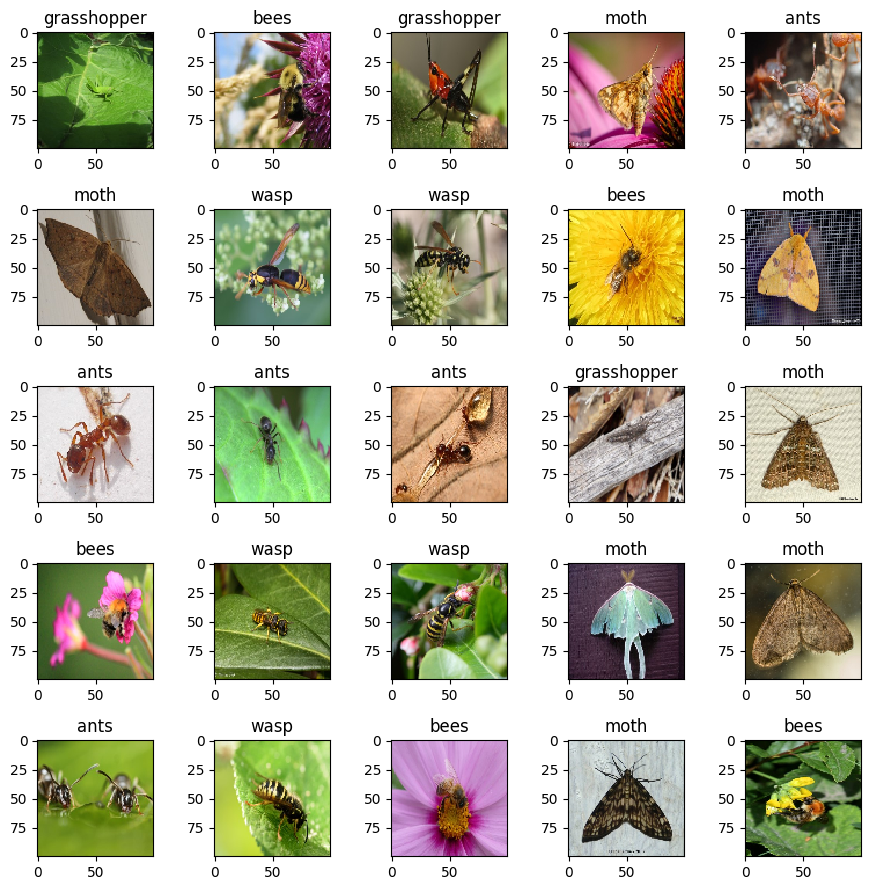

In [ ]:
plt.rcParams['figure.figsize'] = (9, 9)

labels = ['ants', 'grasshopper', 'bees', 'wasp', 'moth']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5, 5, i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    plt.title("{}".format(labels[Y_train_encoded[i]]))

plt.tight_layout()
plt.show()

One-Hot Encoding:

The to_categorical function is used to perform one-hot encoding on the encoded labels, creating Y_train_encoded and Y_test_encoded in the required format for model training.

In [ ]:
from keras.utils import to_categorical

# Encode the categories
Y_train_encoded = to_categorical(Y_train_encoded, num_classes=5)
Y_test_encoded = to_categorical(Y_test_encoded, num_classes=5)

<a id = "cell_model"></a>
## 3. Predictive Modeling

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16


####Original Model Architecture

The original model architecture consists of a stack of convolutional layers followed by max-pooling layers, leading to a fully connected neural network for classification. It comprises three convolutional layers with increasing filter counts (64, 128, 256), each followed by max-pooling. The flattened feature map is then connected to two fully connected layers (512, 128), followed by the output layer with 5 units for the 5 classes. It uses ReLU activation, dropout for regularization, and categorical cross-entropy loss for training.

This architecture follows a pattern of alternating convolutional and max pooling layers to progressively learn and capture increasingly complex features from the input images. The fully connected layers at the end combine these features for final classification. The model's design is intended to strike a balance between feature extraction capacity, regularization (through dropout), and the ability to distinguish between different classes.

####Optimization 1: Data Augmentation

Data augmentation is applied to enhance model generalization. Augmentation techniques like rotation, shifting, shearing, zooming, and flipping are used to create diverse training samples from the existing ones. The model is then trained with the augmented data using the RMSprop optimizer and categorical cross-entropy loss.

**Impact on Results:** Data augmentation is expected to improve the model's ability to generalize to new and unseen images. The increased diversity in training data could result in a reduction of overfitting, leading to better validation and test performance compared to the original code.

In [ ]:
######## Original code #######

# Model architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(1, 1), activation='relu', input_shape=(100, 100, 3)))  # First convolutional layer with 64 filters
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer to downsample the feature maps
    model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, kernel_size=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())                      # Flatten the feature maps before passing to dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))                   # Dropout layer to reduce overfitting
    model.add(Dense(128, activation='relu'))
    model.add(Dense(5, activation='softmax')) # Output layer with 5 units, representing the 5 classes: 'ants', 'grasshopper', 'bees', 'wasp', 'moth'
    model.summary()
    return model


# Define Keras callbacks
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

# Create the model
model = create_model()

# Compile the model
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001, weight_decay=1e-6),
              metrics='accuracy')


####### Optimization 1 #########
####### Using ImageDataGenerator to enhance the model ########

# Data augmentation generator to enhance model generalization
datagen = ImageDataGenerator(
    rotation_range=20,            # Random rotation within [-20, 20] degrees
    width_shift_range=0.2,        # Random horizontal shift within [-0.2, 0.2] of image width
    height_shift_range=0.2,       # Random vertical shift within [-0.2, 0.2] of image height
    shear_range=0.2,              # Random shear transformation within [-0.2, 0.2]
    zoom_range=0.2,               # Random zoom within [0.8, 1.2]
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest')          # Fill missing pixels using nearest available pixels

datagen.fit(X_train)

# Modify model's training call
hist = model.fit(X_train, Y_train_encoded,
                 batch_size=128,
                 epochs=100,
                 verbose=2,
                 validation_data=(X_test, Y_test_encoded),
                 validation_split=0.2,
                 callbacks=keras_callbacks)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 100, 100, 64)      256       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 50, 50, 128)       8320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 25, 25, 256)       33024     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 256)     

####Optimization 2: Learning Rate Scheduling and L2 Regularization
This optimization introduces a learning rate schedule with exponential decay to dynamically adjust the learning rate during training. The L2 regularization technique is applied to the optimizer for weight decay. Additionally, dropout is increased in the fully connected layers for improved generalization.

**Impact on Results**: Learning rate scheduling helps the optimization process by adapting the learning rate as training progresses, potentially leading to faster convergence and better generalization. L2 regularization helps control the complexity of the model and can improve its robustness to noise. This optimization may result in a smoother decrease in loss and better generalization, leading to improved validation and test performance.

In [ ]:
######## Optimization 2 #######
######## Learning rate scheduling and L2 regularization ########

# Create the model
lrmodel = create_model()

# Define Keras callbacks with learning rate scheduling
# Set up a learning rate schedule that decreases exponentially over time.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate
    decay_steps=10000,  # Number of steps after which the learning rate decays
    decay_rate=0.9)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, weight_decay=1e-4)  # RMSprop optimizer with learning rate scheduling
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]  # Early stopping callback to prevent overfitting

# Compile the model with L2 regularization
# Compile the model with categorical cross-entropy loss and the defined optimizer.
lrmodel.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])  # Monitor accuracy during training

# Train the model with more dropout
# Fit the model on the training data using the defined parameters.
hist = lrmodel.fit(X_train, Y_train_encoded,
                 batch_size=128,
                 epochs=100,
                 verbose=2,
                 validation_data=(X_test, Y_test_encoded),
                 validation_split=0.2,
                 callbacks=keras_callbacks)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 100, 100, 64)      256       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 50, 50, 128)       8320      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 25, 25, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 25, 25, 256)       33024     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 256)    

####Optimization 3: Transfer Learning with VGG16
Transfer learning is employed using the VGG16 architecture as the base model. The pre-trained VGG16 model is loaded with weights from the 'imagenet' dataset, and its layers are frozen to prevent retraining. A new architecture is constructed on top of the base, consisting of a single convolutional layer, a flatten layer, two fully connected layers (128, 5), and dropout for regularization. The model is compiled with categorical cross-entropy loss and Adam optimizer.

**Impact on Results:** Transfer learning with a pre-trained model allows the model to benefit from features learned from a large dataset (ImageNet). This can lead to improved feature extraction, faster convergence, and better generalization. The frozen base layers also prevent overfitting. Consequently, this optimization attempt is likely to yield significant performance improvements in terms of accuracy and other metrics.

In [ ]:
####### Optimization 3 ########
####### Using Transfer Learning with Pre-trained Models in CNN models #######


# Create a transfer learning model using VGG16 as base model
def Trained_transfer_model():
    # Load the pre-trained VGG16 model with weights from 'imagenet' dataset
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

    # Freeze all layers in the pre-trained VGG16 model
    for layer in base_model.layers:
        layer.trainable = False           # Freeze pre-trained layers

     # Build the new transfer learning model
    model = Sequential([
        base_model,                                        # Add the pre-trained VGG16 model as the base
        Conv2D(64, kernel_size=(1, 1), activation='relu'), #Convulation layer is optional but enhances the model
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')    # Add the output layer with 5 units for classification
    ])

    # Compile the model using categorical cross-entropy loss and Adam optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display the summary of the model architecture
    model.summary()

    return model

# Create an instance of the transfer learning model
transfer_model = Trained_transfer_model()

# Train the transfer learning model using the training data
hist_transfer = transfer_model.fit(X_train, Y_train_encoded,
                                   batch_size=128,
                                   epochs=100,
                                   verbose=2,
                                   validation_data=(X_test, Y_test_encoded),
                                   validation_split=0.2,
                                   callbacks=keras_callbacks)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 conv2d_25 (Conv2D)          (None, 3, 3, 64)          32832     
                                                                 
 flatten_11 (Flatten)        (None, 576)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               73856     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 5)                 645       
                                                                 
Total params: 14,822,021
Trainable params: 107,333
No

<a id = "cell_report"></a>
## 4. Experiments Report


#### Optimization 1: Data Augmentation for Improved Model Generalization
- **Cohen's Kappa:** 0.605

  - The Cohen's Kappa value of 0.605 indicates moderate agreement between predicted and actual classes.
  - The accuracy on the training data is very high (98.96%), but on the test data, it drops to 68.44%. This suggests overfitting, where the model performs well on the training data but struggles to generalize to unseen data.
  - The precision, recall, and F1-score values in the classification report indicate a varying degree of performance for different classes. Some classes, like "bees," have good precision and recall, while others like "grasshopper" have lower values.

#### Optimization 2: Learning Rate Scheduling
- **Cohen's Kappa:** 0.632

  - The Cohen's Kappa value of 0.632 shows moderate to substantial agreement.
  - The model's overfitting issue has improved compared to the first optimization, with a test accuracy of 70.61%. The gap between training and test accuracy has decreased.
  - Similar to the first optimization, the classification report provides information on the model's performance across different classes.

#### Optimization 3: Utilizing Pre-trained Model (VGG16)
- **Cohen's Kappa:** 0.786

  - The Cohen's Kappa value of 0.786 suggests substantial agreement.
  - The model's performance has significantly improved compared to the previous optimizations, with a test accuracy of 82.84% and a minimal overfitting issue.
  - The utilization of a pre-trained model, VGG16, has helped the model to generalize better and achieve higher accuracy on the test data.

<br>



 **Utilizing Pre-trained Model:** The third optimization utilizing a pre-trained model (VGG16) has shown the best performance in terms of accuracy and generalization. This model can provide a reliable way to classify agricultural pests and potentially provide insights into pest management strategies.

 **Model Use in Business:** With the highly accurate pre-trained model, organizations could develop a tool that helps agricultural professionals and enthusiasts identify potential pests or friends among insects found in agricultural settings. The model could be integrated into mobile apps or web platforms, allowing users to upload images of insects and receive instant classification results. This can aid in early pest detection and help make informed decisions about pest control strategies, potentially leading to more effective and sustainable agricultural practices.

 **Model Refinement:**

The first two optimizations suffer from overfitting to some extent, leading to a gap between training and test accuracy. This means that the models perform well on seen data but may struggle with real-world applications due to poor generalization. One approach to improving the performance of pest recognition models is to use a more complex model. This can be done by using a deeper CNN model, or by using a model with more parameters. For example, the study by Liu et al. (2022) used an improved deep convolution neural network with parallel attention mechanism module and residual blocks. This model showed significant advantages in terms of accuracy and real-time performance compared with other models.

Another approach to improving the performance of pest recognition models is to use transfer learning where a model trained on one task is used as a starting point for training a model on a new task. This can be helpful for pest recognition, as there are many similarities between different types of pests. For example, the aforementioned study used a pest image recognition and analysis model that was constructed based on VGG16 (used in this report) and Inception-ResNet-v2 transfer learning network. This model showed improved accuracy for crop pest recognition and classification.

In addition to using a more complex model or transfer learning, there are other techniques that can be used to improve the performance of pest recognition models. These techniques include:

* Collecting more images of pests: This will help the model to learn the subtle differences between different types of pests.
* Using data preprocessing techniques: This can help to improve the quality of the data and make it easier for the model to learn.
* Using regularization techniques: This can help to prevent the model from overfitting the training data.
* Using additional features: This can help the model to distinguish between pests that look similar. For example, CSIRO (n.d.) suggested using additional features such as wing venation patterns, antennae shape, or body shape to address the issue of confusion between wasps and bees.

In [ ]:
from tabulate import tabulate
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

Optimization 1: Data Augmentation for Improved Model Generalization
16/16 [==============================] - 0s 8ms/step
Cohen's Kappa: 0.605

Results Table:
+----------+---------+--------+
| Metric   |   Train |   Test |
+==========+=========+========+
| Loss     |  0.0502 | 1.2896 |
+----------+---------+--------+
| Accuracy |  0.9896 | 0.6844 |
+----------+---------+--------+

Classification Report:
               precision    recall  f1-score   support

        ants       0.64      0.70      0.67       106
 grasshopper       0.56      0.48      0.52       100
        bees       0.75      0.65      0.69       105
        wasp       0.92      0.72      0.81        96
        moth       0.63      0.88      0.74       100

    accuracy                           0.68       507
   macro avg       0.70      0.68      0.68       507
weighted avg       0.70      0.68      0.68       507



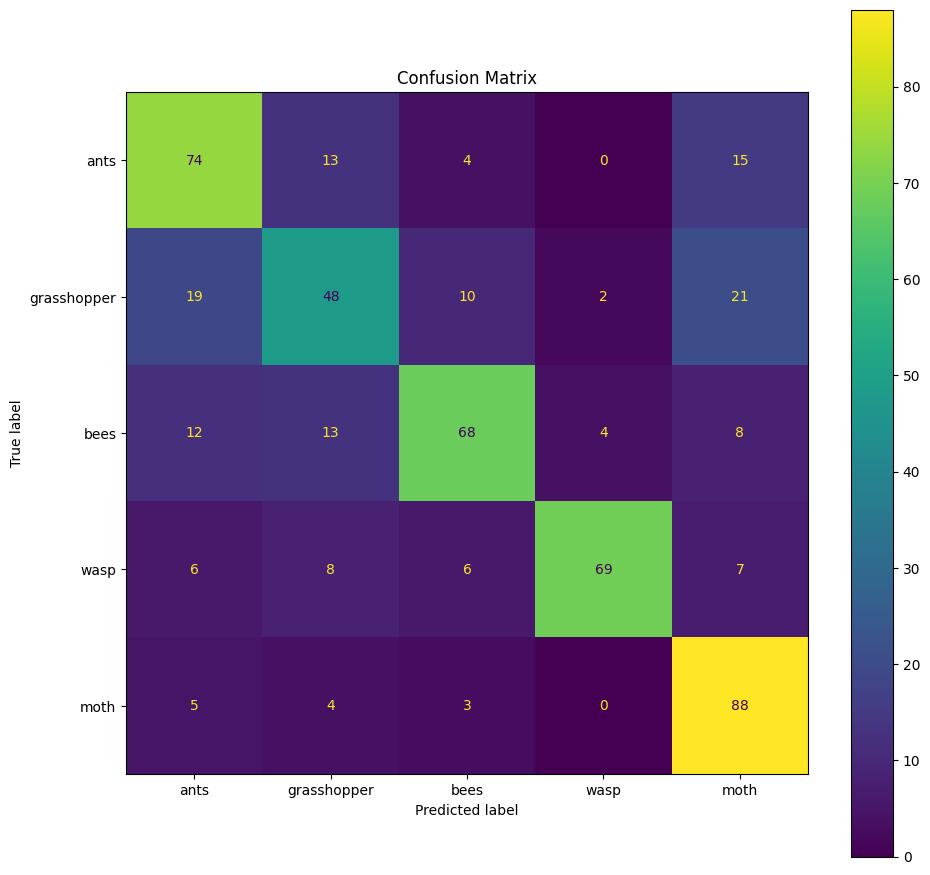

In [ ]:
print("Optimization 1: Data Augmentation for Improved Model Generalization")
train_score = model.evaluate(X_train, Y_train_encoded, verbose=0)
test_score = model.evaluate(X_test, Y_test_encoded, verbose=0)

results_table = [
    ["Metric", "Train", "Test"],
    ["Loss", round(train_score[0], 4), round(test_score[0], 4)],
    ["Accuracy", round(train_score[1], 4), round(test_score[1], 4)]
]

# Print classification report and Cohen's Kappa
y_pred = model.predict(X_test)
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(Y_test_encoded, axis=1)

kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
classification_report_text = classification_report(y_test_multiclass, y_pred_multiclass, target_names=categories)

print("Cohen's Kappa:", round(kappa, 3))

# Print the results table
print("\nResults Table:")
print(tabulate(results_table, headers="firstrow", tablefmt="grid"))
print("\nClassification Report:\n", classification_report_text)

# Generate and display confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred_multiclass)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
fig = plt.figure(figsize=(11, 11))
ax = fig.subplots()
display.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()


Optimization 2: Learning rate scheduling
16/16 [==============================] - 0s 8ms/step
Cohen's Kappa: 0.632

Results Table:
+----------+---------+--------+
| Metric   |   Train |   Test |
+==========+=========+========+
| Loss     |  0.0781 | 1.046  |
+----------+---------+--------+
| Accuracy |  0.9763 | 0.7061 |
+----------+---------+--------+

Classification Report:
               precision    recall  f1-score   support

        ants       0.67      0.71      0.69       106
 grasshopper       0.59      0.60      0.60       100
        bees       0.67      0.75      0.71       105
        wasp       0.93      0.69      0.79        96
        moth       0.74      0.78      0.76       100

    accuracy                           0.71       507
   macro avg       0.72      0.71      0.71       507
weighted avg       0.72      0.71      0.71       507



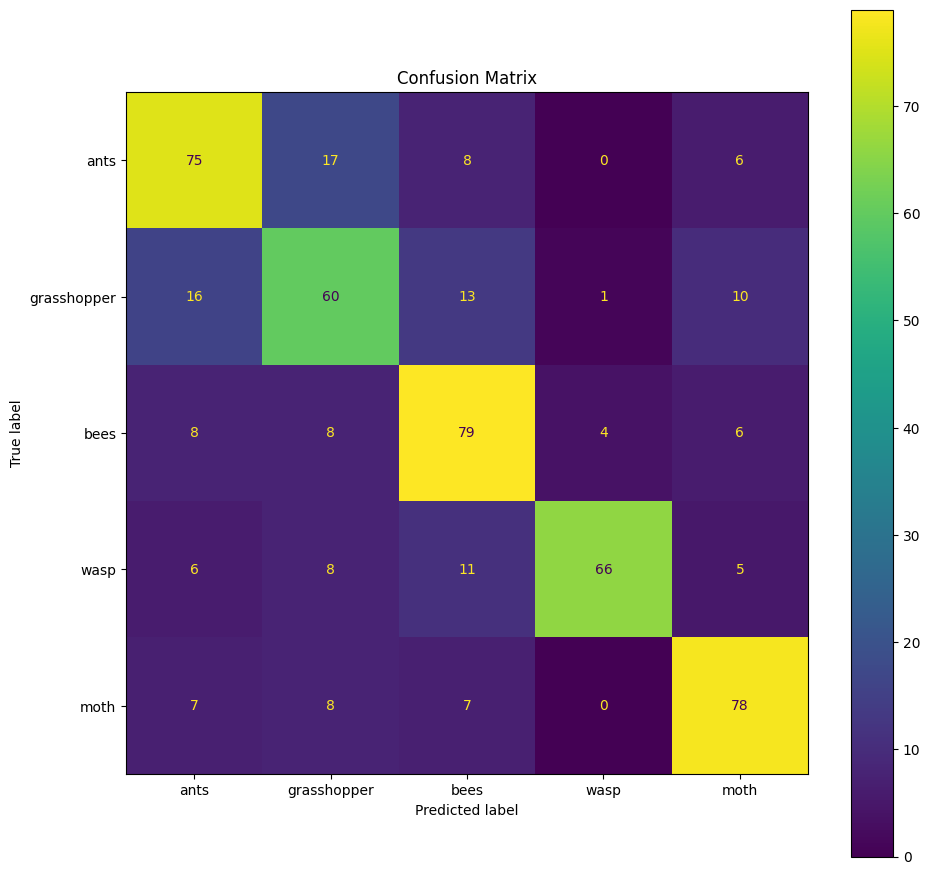

In [ ]:
print("Optimization 2: Learning rate scheduling")
train_score = lrmodel.evaluate(X_train, Y_train_encoded, verbose=0)
test_score = lrmodel.evaluate(X_test, Y_test_encoded, verbose=0)

results_table = [
    ["Metric", "Train", "Test"],
    ["Loss", round(train_score[0], 4), round(test_score[0], 4)],
    ["Accuracy", round(train_score[1], 4), round(test_score[1], 4)]
]

# Print classification report and Cohen's Kappa
y_pred = lrmodel.predict(X_test)
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(Y_test_encoded, axis=1)

kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
classification_report_text = classification_report(y_test_multiclass, y_pred_multiclass, target_names=categories)

print("Cohen's Kappa:", round(kappa, 3))

# Print the results table
print("\nResults Table:")
print(tabulate(results_table, headers="firstrow", tablefmt="grid"))
print("\nClassification Report:\n", classification_report_text)

# Generate and display confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred_multiclass)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
fig = plt.figure(figsize=(11, 11))
ax = fig.subplots()
display.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()


Optimization 3: Utilizing pre-trained model (VGG16)
16/16 [==============================] - 1s 31ms/step
Cohen's Kappa: 0.786

Results Table:
+----------+---------+--------+
| Metric   |   Train |   Test |
+==========+=========+========+
| Loss     |  0.0096 | 0.7099 |
+----------+---------+--------+
| Accuracy |  0.9995 | 0.8284 |
+----------+---------+--------+

Classification Report:
               precision    recall  f1-score   support

        ants       0.85      0.77      0.81       106
 grasshopper       0.77      0.79      0.78       100
        bees       0.84      0.81      0.83       105
        wasp       0.81      0.81      0.81        96
        moth       0.87      0.96      0.91       100

    accuracy                           0.83       507
   macro avg       0.83      0.83      0.83       507
weighted avg       0.83      0.83      0.83       507



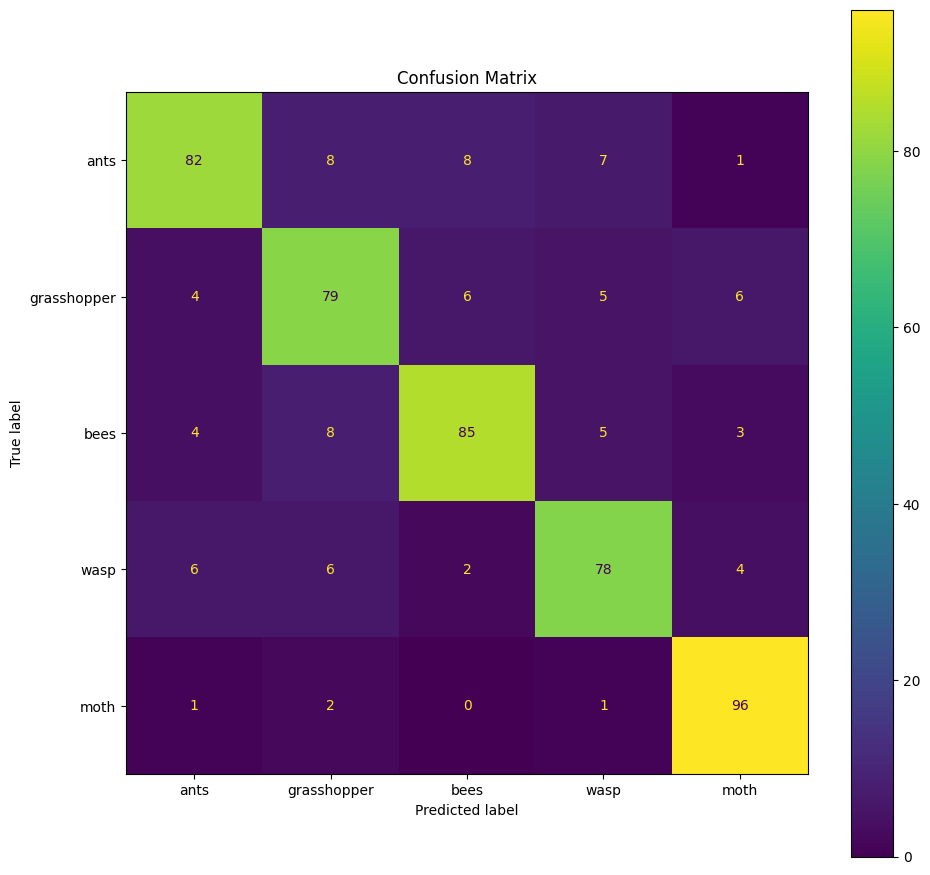

In [ ]:
print("Optimization 3: Utilizing pre-trained model (VGG16)")
train_score = transfer_model.evaluate(X_train, Y_train_encoded, verbose=0)
test_score = transfer_model.evaluate(X_test, Y_test_encoded, verbose=0)

results_table = [
    ["Metric", "Train", "Test"],
    ["Loss", round(train_score[0], 4), round(test_score[0], 4)],
    ["Accuracy", round(train_score[1], 4), round(test_score[1], 4)]
]

# Print classification report and Cohen's Kappa
y_pred = transfer_model.predict(X_test)
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(Y_test_encoded, axis=1)

kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
classification_report_text = classification_report(y_test_multiclass, y_pred_multiclass, target_names=categories)

print("Cohen's Kappa:", round(kappa, 3))

# Print the results table
print("\nResults Table:")
print(tabulate(results_table, headers="firstrow", tablefmt="grid"))
print("\nClassification Report:\n", classification_report_text)

# Generate and display confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred_multiclass)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
fig = plt.figure(figsize=(11, 11))
ax = fig.subplots()
display.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()


1/1 [==============================] - 0s 23ms/step


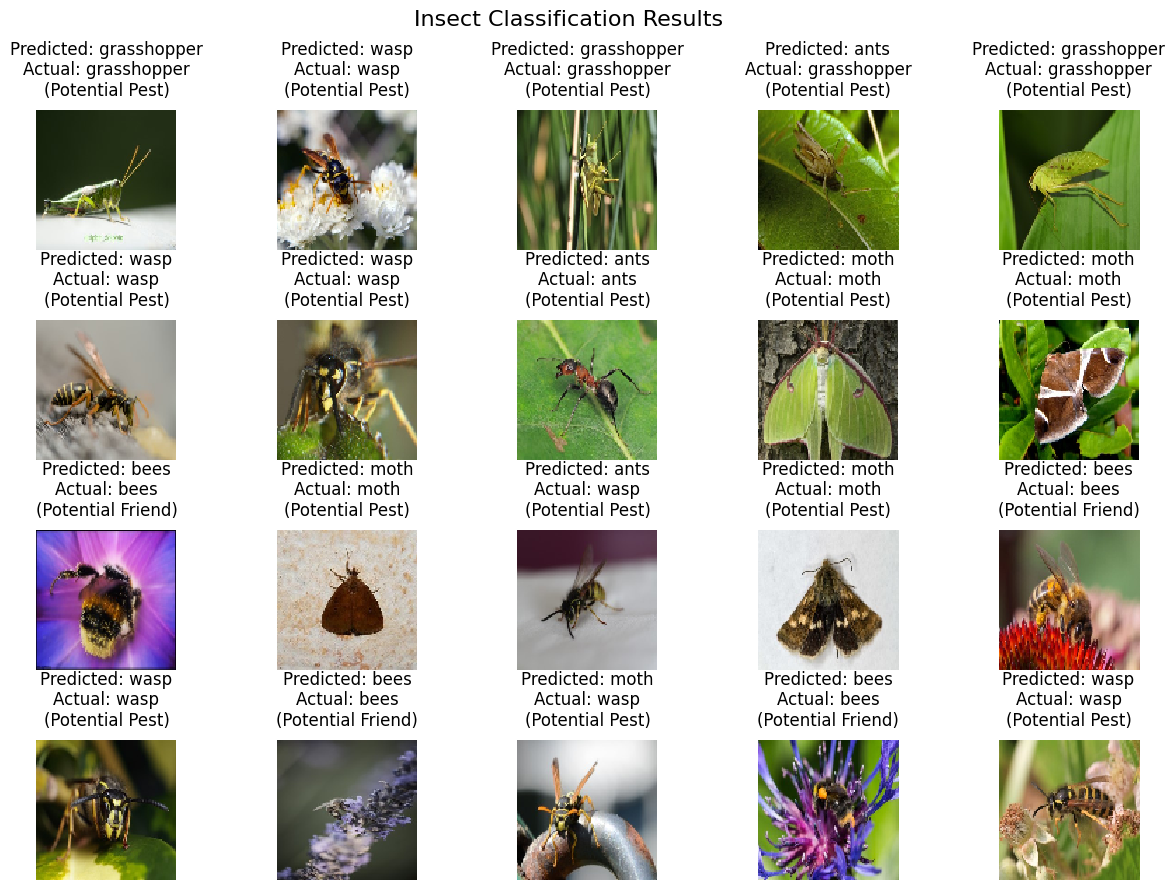

In [ ]:
def plot_images(ims, figsize=(12, 12), cols=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims[:, :, :, 0]
    f = plt.figure(figsize=figsize)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    rows = len(ims) // cols if len(ims) % cols == 0 else len(ims) // cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i + 1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12, pad=10)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

# Print sample predictions for the best model
img_range = range(20)
sample_imgs = X_test[img_range]
true_labels = [categories[idx] for idx in y_test_multiclass[img_range]]
predictions = model.predict(sample_imgs)
pred_labels = [categories[np.argmax(x)] for x in predictions]
titles = []


for i in img_range:
    if pred_labels[i] == "bees":
        title = f"Predicted: {pred_labels[i]}\nActual: {true_labels[i]}\n(Potential Friend)"
    else:
        title = f"Predicted: {pred_labels[i]}\nActual: {true_labels[i]}\n(Potential Pest)"
    titles.append(title)

plot_images(sample_imgs, cols=5, figsize=(15, 10), titles=titles)
plt.suptitle("Insect Classification Results", fontsize=16)
plt.show()


##References

- MIS780 Week 5 seminar code with modication

- A. Singh, “Augmentation Methods using Albumentations and PyTorch,” Towards Data Science, 2021
https://towardsdatascience.com/augmentation-methods-using-albumentations-and-pytorch-35cd135382f8

- CodeEase.net, 2019, Keras Callbacks – Learning Rate Scheduler, viewed 30 August 2023, https://codeease.net/programming/python/keras-callbacks-learning-rate-scheduler.

- J. Brownlee, “How to Use Transfer Learning When Developing Convolutional Neural Network Models for Computer Vision,” Machine Learning Mastery, 2021.
https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

- S. Gupta, “CNN Transfer Learning with VGG16 using Keras,” Analytics Vidhya, 2020
https://medium.com/analytics-vidhya/cnn-transfer-learning-with-vgg16-using-keras-b0226c0805bd

- Stack Overflow, 2016, Setting up a LearningRateScheduler in Keras, viewed 30 August 2023, https://stackoverflow.com/questions/39779710/setting-up-a-learningratescheduler-in-keras.

- TensorFlow, 2021, tf.keras.callbacks.LearningRateScheduler, viewed 30 August 2023, https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler.

